# Eigenfaces

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA


The eigenfaces algorithm aims to build a basis for a vector space, In the first stage, we aim to create a good representation of a human face. To achieve this, we take a set $\textit{F}$ of face images and apply the PCA (Principal Component Analysis) algorithm to create a representation, this is  finding its eigenvectors. These eigenvectors are used to construct a basis for a vector space and in particular for the faces and represent each face as a linear combination of these vectors. This approach allows us to represent any new face as a linear combination of the base vectors in this vector space.

First of all we load the data of every face flatten in a $1-$dimensional vector and storage in the variable train, also storage a dictionary with the data of the flatten faces and the images in a variable faces.

In [4]:
faces = fetch_olivetti_faces()
train= faces['data']

Now we are going to see one of the faces and show his shape

(64, 64)

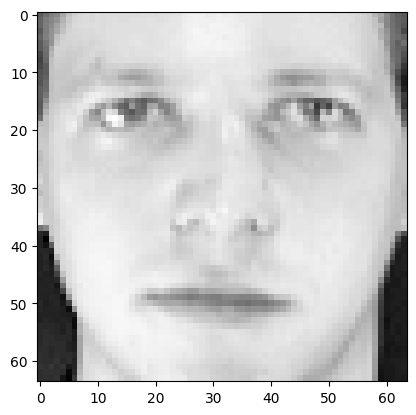

In [5]:
plt.imshow(faces['images'][0]*-1,cmap='Greys')
faces['images'][0].shape

In [6]:
def plot(images,nums,n):

    fig, axs = plt.subplots(n,n)
    
    plt.suptitle('Some faces examples')
    plt.axis('off')
    count=0
    for i in range(0,n):
        for j in range(0,n):
            axs[i,j].imshow(images[nums[count]]*-1,cmap='Greys')
            count+=1
           
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])
    fig.tight_layout(pad=1.0)
    fig.set_figwidth(10)
    fig.set_figheight(8)
    plt.show()

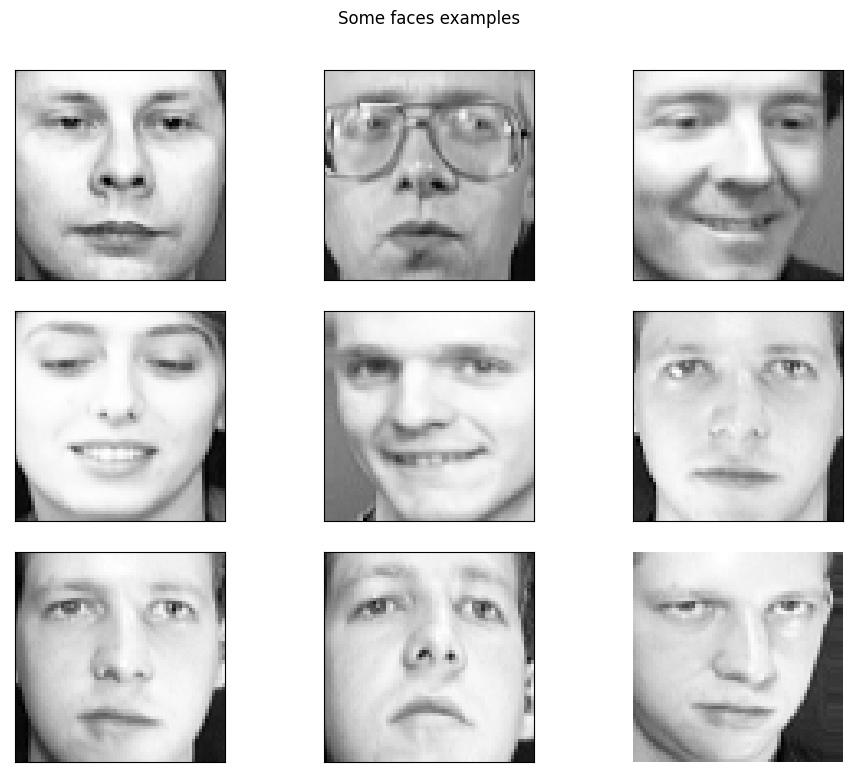

In [7]:
plot(faces['images'],[33,12,21,72,44,0,7,8,9],3)

After see some examples of the images on the dataset we are going to create a PCA object that create the eigenfaces

# Calculating eigenfaces with principal componen analysis

In order to build the base we are going to create a PCA object 

In [62]:
n_components = 90
def learn_eigenfaces(train,n_components):
    decomposition= PCA(n_components,whiten=True)
    decomposition.fit(train)
    base= decomposition.components_
    eigenfaces= np.reshape(base,(n_components,64,64))
    print('Successful learning')
    return base, eigenfaces

In [63]:
base, eigenfaces = learn_eigenfaces(train, n_components)

Successful learning


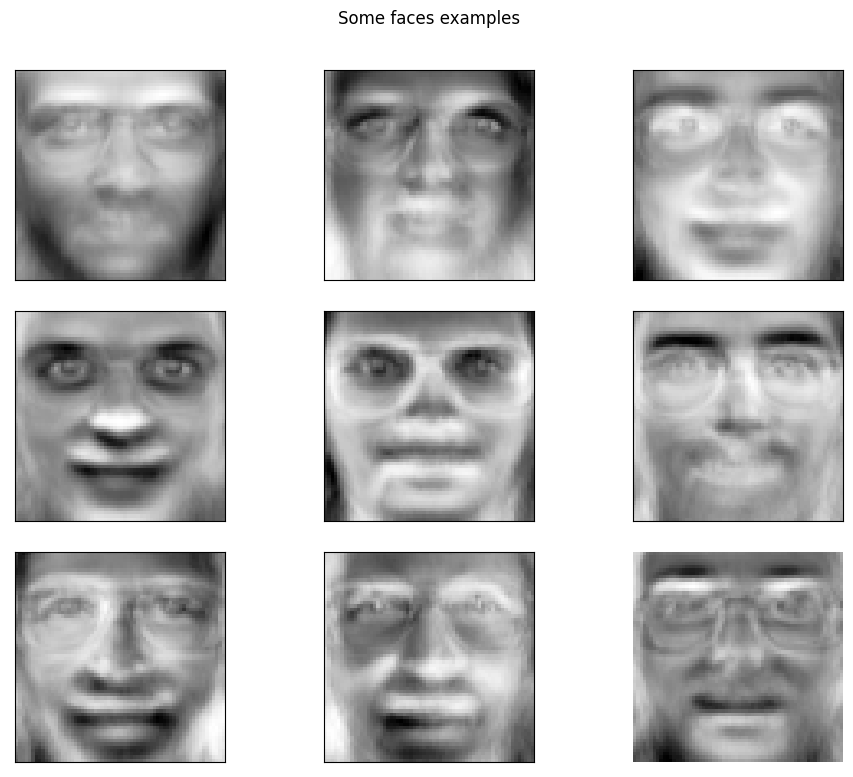

In [64]:
plot(eigenfaces[2:29],list(range(0,9)),3)

In [65]:
image= cv2.imread('images/myphoto.jpeg',0)

image_scale = cv2.resize(image, (64, 64))
flatten_image=np.ravel(image_scale)/255.

To view the similarity between my face and each eigenface we use a dot product between each eigenface and my face, if the matrix of eigenfaces is denominated $E$ then we want to see the dot product of every row and my own face, who i name a vector $f$ Then $Ef$ give us a vector of similarity

In [74]:
vector=base@flatten_image

In [67]:
mejores_n = lambda vector,n : np.argsort(np.abs(base@vector))[n::]

In [68]:
best=mejores_n(flatten_image,10)

Here we take the $9$ best eigenfaces that describe my face 

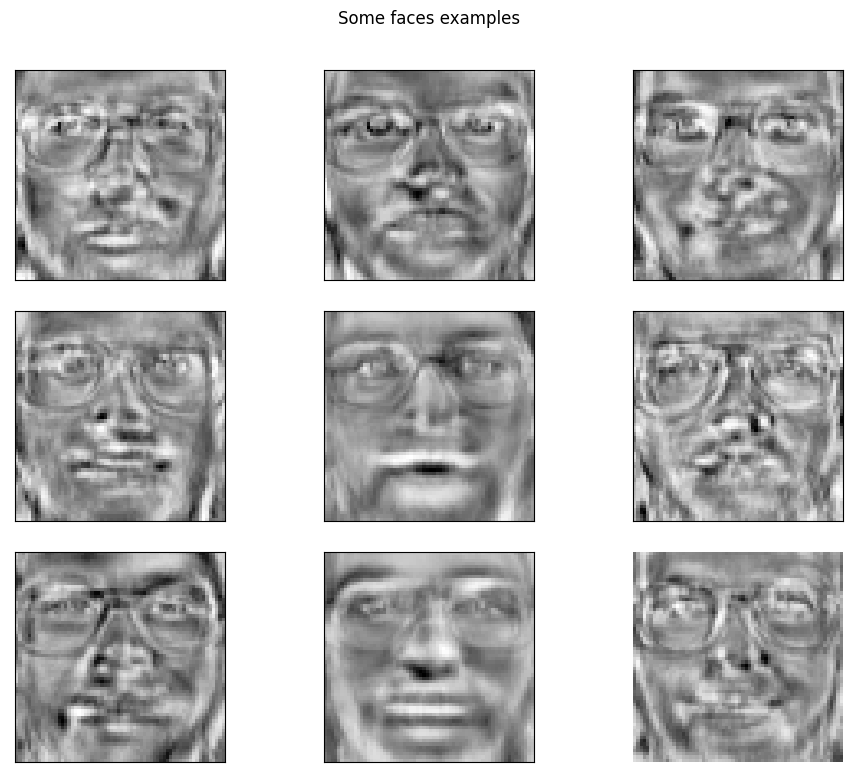

In [79]:
plot(eigenfaces,best,3)

To see how well the eigenfaces works we are going to use two images of my face and see if the angle between them are small

In [73]:
image2= cv2.imread('images/myphoto2.jpeg',0)

image_scale2 = cv2.resize(image, (64, 64))
flatten_image2=np.ravel(image_scale)/255.

In [75]:
vector1= base@flatten_image2

In [78]:
norm= lambda vector : np.linalg.norm(vector)
distance= lambda u,v : u@v/(norm(u)*norm(v))
distance(vector,vector1)

1.0

With this we can see that is an effective system to recognize faces and work with two pictures of my face like paralel vectors